# Wrangle and Analyze Data Project

## Gathering Data

In [1]:
#import required libiries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

### 1- Gathering Data from The WeRateDogs Twitter archive

In [2]:
df_1= pd.read_csv("twitter-archive-enhanced.csv")
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2- Gathering Data from The tweet image predictions

In [3]:
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name= url.split('/')[-1]
response= requests.get(url)

with open ("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
df_2= pd.read_csv(file_name, sep="\t")
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3- Gathering Data from Twitter API

In [5]:
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [6]:
#Experimenting to extract one tweet's id information after creating an API object

exp_tweet = api.get_status(df_1.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [7]:
# Checking the keys of the test tweet
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [8]:
# Getting the retweet_count and favorite_count for the test tweet
exp_tweet.retweet_count, exp_tweet.id, exp_tweet.favorite_count

(2108, 747963614829678593, 5720)

In [9]:
# create the file and write on it

errors = []
if not os.path.isfile('tweet_json.txt'):
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in df_1['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)


- there is 25 error message but it is not showing because of the files is already created.

In [10]:
# Build a dataframe from reading the json file

df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append(data)
        
df_all = pd.DataFrame(df_list, columns = df_list[0].keys())
df_3 = df_all[['id', 'retweet_count', 'favorite_count']]
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,7594,35854
1,892177421306343426,5626,30936
2,891815181378084864,3721,23282
3,891689557279858688,7772,39125
4,891327558926688256,8368,37383


## Assessing Data

### 1- Assessing The WeRateDogs Twitter archive

In [11]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
df_1.shape

(2356, 17)

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_1.duplicated().sum()

0

In [17]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# Check names in names column
df_1.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
an               7
Toby             7
Bailey           7
Daisy            7
Buddy            7
Milo             6
Oscar            6
Bella            6
Koda             6
Jax              6
Stanley          6
Scout            6
Leo              6
Dave             6
Jack             6
Rusty            6
Phil             5
              ... 
Emmie            1
Rorie            1
Farfle           1
Rontu            1
Sojourner        1
Shakespeare      1
Pippin           1
Longfellow       1
Cilantro         1
Miguel           1
Kellogg          1
Holly            1
Pupcasso         1
Storkson         1
Trigger          1
Cuddles          1
Jazz             1
Barney           1
Mojo             1
Brockly          1
Norman           1
Finnegus    

### 2- Assessing The tweet image predictions

In [19]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
df_2.shape

(2075, 12)

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_2.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [23]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
df_2.duplicated().sum()

0

In [25]:
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
df_2["jpg_url"].duplicated().sum()

66

### 3- Assessing Tweeter API

In [27]:
df_3

,id,retweet_count,favorite_count
0,892420643555336193,7594,35854
1,892177421306343426,5626,30936
2,891815181378084864,3721,23282
3,891689557279858688,7772,39125
4,891327558926688256,8368,37383
5,891087950875897856,2805,18833
6,890971913173991426,1828,10938
7,890729181411237888,16979,60397
8,890609185150312448,3863,25924
9,890240255349198849,6610,29596


In [28]:
df_3.shape

(2331, 3)

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [30]:
df_3.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [31]:
df_3.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2668.586873,7486.577864
std,6.823170e+16,4512.996522,11622.336270
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,541.000000,1303.000000
50%,7.182469e+17,1248.000000,3252.000000
75%,7.986692e+17,3101.500000,9168.000000
max,8.924206e+17,76718.000000,154488.000000


In [32]:
df_3.duplicated().sum()

0

In [33]:
df_3.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [34]:
df_3.duplicated().sum()

0

### Quality
#### (df_1) Twitter Archive file  
- retweats needs to be deleted
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` are not important columns will be dropped
- `expanded_urls` has 59 missing values
- `tweet_id` is stored as intger. change it to string
- `timestamp` is stored as string.change it to datetime
- In `name` column, 745 are stored as "none", 55 are stored as "a", 8 are stored as "the", 7 are stored as "an" 1 is stored as "my" and 1 is stored as "by"

#### (df_2) Image Prediction file 
- change `tweet_id` to string
- Remove duplicates from `jpg_url` Column

#### (df_3) Twitter API file
- Change `id` column name to `tweet_id` to be unique
-  make `tweet_id` type as string


### Tidiness
#### (df_1) Twitter Archive file  
- Adjust doggo floofer puppo pupper Dog Stage columns to be one column `dog_stage` and make values unique.

        
#### (df_2)Image Prediction file 
- merge the image predictions dataframe to the twitter Achive dataframe

#### (df_3) Twitter API file
- merge the Twitter Api dataframe to the twitter Achive dataframe
        

## Cleaning Data

In [35]:
# Create copies of the three dataframes
df_1_clean= df_1.copy()
df_2_clean= df_2.copy()
df_3_clean= df_3.copy()

### Define 1- retweats needs to be deleted in df_1

### Code

In [36]:
df_1_clean= df_1_clean[df_1_clean.retweeted_status_id.isna()]

### Test

In [37]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define 
###### 2- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` are not important columns will be dropped

### Code

In [38]:
df_1_clean= df_1_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

### Test

In [39]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define 3- `expanded_urls` has 59 missing values will be dropped

### Code

In [40]:
df_1_clean= df_1_clean.dropna()

### Test

In [41]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


### Define 4- change `tweet_id` type to String

### Code

In [42]:
df_1_clean.tweet_id = df_1_clean.tweet_id.astype(str)

### Test

In [43]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(2), object(10)
memory usage: 215.0+ KB


### Define 5- change `timestamp` type to Datetime

### Code

In [44]:
df_1_clean["timestamp"]= pd.to_datetime(df_1_clean["timestamp"])

### Test

In [45]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 215.0+ KB


### Define
6- In `name` column, 745 are stored as "none", 55 are stored as "a", 8 are stored as "the", 7 are stored as "an" 1 is stored as "my" and 1 is stored as "by"

### Code

In [46]:
df_1_clean["name"]=df_1_clean["name"].replace(to_replace=['none', 'a',"an","the","my","by"], value=np.nan)

### Test

In [47]:
df_1_clean["name"].value_counts()

None          622
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Winston         8
Lola            8
Daisy           7
Toby            7
Jax             6
Stanley         6
Koda            6
Bella           6
Oscar           6
Bo              6
Bailey          6
Buddy           5
Chester         5
Scout           5
Rusty           5
Dave            5
Milo            5
Leo             5
Bentley         5
Louis           5
Finn            4
Jerry           4
             ... 
Leela           1
Petrick         1
Fwed            1
Kevon           1
Mya             1
Monkey          1
Hanz            1
Chesterson      1
Daniel          1
Julius          1
Hector          1
Liam            1
Kendall         1
Chaz            1
Perry           1
Jamesy          1
Sundance        1
Pipsy           1
Mairi           1
Al              1
Blu             1
Ed              1
Jerome          1
Zooey           1
Tupawc    

### Define 
7- Adjust `doggo` `floofer` `puppo` `pupper`  Dog Stage columns to be one column `dog_stage` and make values unique.

### Code

In [48]:
# Replace "None" with empty string
df_1_clean['doggo'] = df_1_clean['doggo'].replace('None', '')
df_1_clean['floofer'] = df_1_clean['floofer'].replace('None', '')
df_1_clean['pupper'] = df_1_clean['pupper'].replace('None', '')
df_1_clean['puppo'] = df_1_clean['puppo'].replace('None', '')


In [49]:
# Combine the columns into one column
df_1_clean['dog_stage'] = df_1_clean['doggo'] + df_1_clean['floofer'] + df_1_clean['pupper'] + df_1_clean['puppo']

In [50]:
df_1_clean.dog_stage.value_counts()

                1779
pupper           222
doggo             72
puppo             23
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [51]:
# Modify the un-defined named
df_1_clean.dog_stage = df_1_clean.dog_stage.replace(["doggopupper","doggofloofer","doggopuppo",""], 'Un-defined')


In [52]:
# Remove 'doggo', 'floofer', 'pupper', 'puppo' columns
df_1_clean= df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [53]:
df_1_clean.dog_stage.value_counts()

Un-defined    1791
pupper         222
doggo           72
puppo           23
floofer          9
Name: dog_stage, dtype: int64

In [54]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2046 non-null object
dog_stage             2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.4+ KB


### Define  8- change `tweet_id` to string

### Code

In [55]:
df_2_clean.tweet_id= df_2_clean.tweet_id.astype(str)

### Test

In [56]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define  9- Remove duplicates from `jpg_url` Column

### Code

In [57]:
df_2_clean= df_2_clean.drop_duplicates(["jpg_url"])

### Test

In [58]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### Define  10- Change `id` to `tweet_id` and make type as string

### Code

In [59]:
df_3_clean.rename(columns={'id':'tweet_id'}, inplace=True)
df_3_clean.tweet_id= df_3_clean.tweet_id.astype(str)

### Test

In [60]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


##  Storing Data

In [61]:
tweet_master_data = pd.merge(pd.merge(df_1_clean, df_2_clean, on = 'tweet_id'), df_3_clean, on= 'tweet_id')

In [62]:
tweet_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 22 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1917 non-null object
dog_stage             1987 non-null object
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
retweet_count         1987 non-

In [63]:
tweet_master_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Un-defined,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7594,35854
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Un-defined,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5626,30936
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Un-defined,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3721,23282
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Un-defined,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7772,39125
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Un-defined,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8368,37383


In [64]:
tweet_master_data.to_csv('twitter_archive_master.csv')

##  Data Analysis and Visual Reporting

In [67]:
df= tweet_master_data.copy()

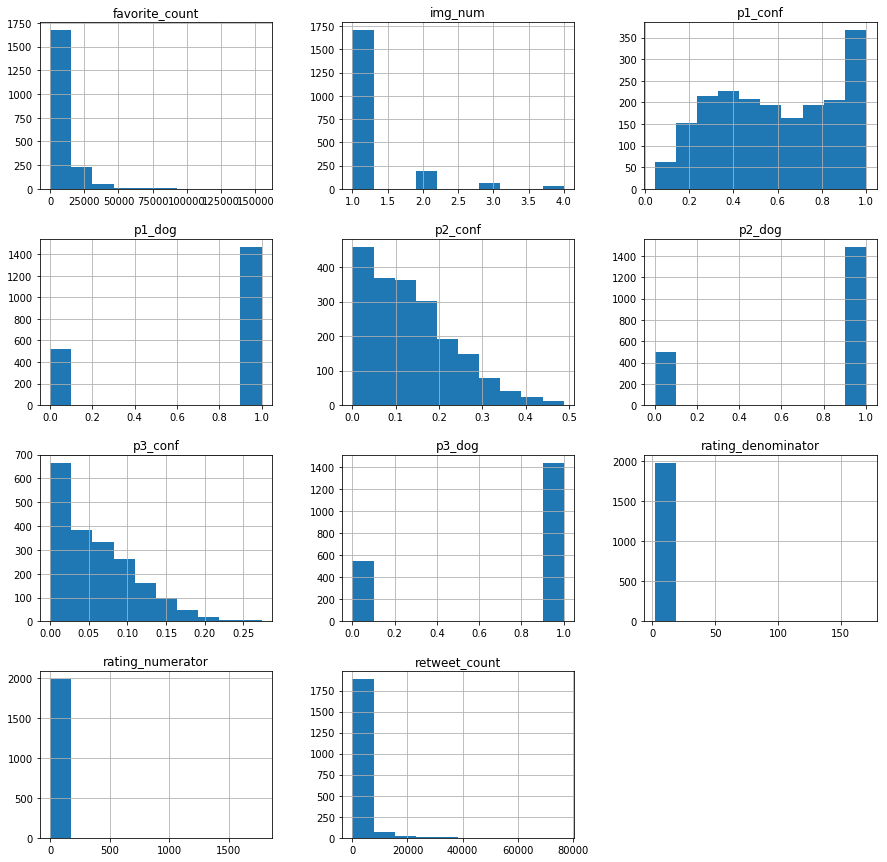

In [68]:
# show some statistics about DataFrame graphically
df.hist(figsize=(15,15));

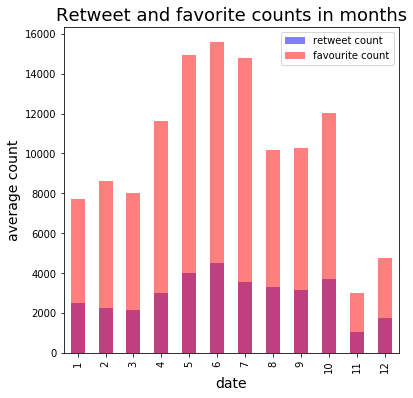

In [78]:
# Retweet and favorite average count in months
df['month'] = df['timestamp'].dt.month

df.groupby("month").retweet_count.mean().plot(kind="bar",alpha=0.5, color= "blue", figsize=(6,6))
df.groupby("month").favorite_count.mean().plot(kind="bar",alpha=0.5, color="red", figsize=(6,6))
plt.legend(labels=["retweet count", 'favourite count'])
plt.title("Retweet and favorite average counts in months", size=18)
plt.xlabel("Month", size=14)
plt.ylabel('Average count', size=14);

- the average count of favourites and Retweets reaches it's most values in June and reached it's less values on November.

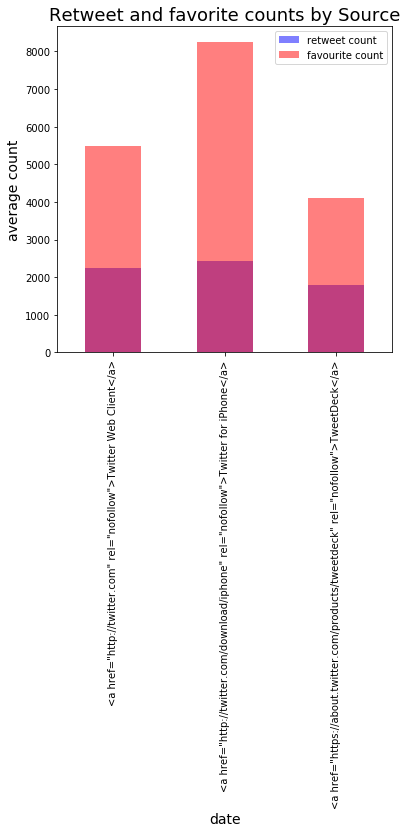

In [105]:
# Retweet and favorite average by Source

df.groupby("source").retweet_count.mean().plot(kind="bar",alpha=0.5, color= "blue", figsize=(6,6))
df.groupby("source").favorite_count.mean().plot(kind="bar",alpha=0.5, color="red", figsize=(6,6))
plt.legend(labels=["retweet count", 'favourite count'])
plt.title("Retweet and favorite counts by Source", size=18)
plt.xlabel("date", size=14)
plt.ylabel('average count', size=14);


- the average count of favourites is very high when the source is Twitter for iPhone than the other sources like Tiwtter Web Client or TweetDeck

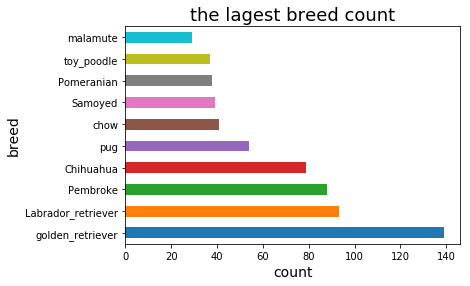

In [140]:
# Get the lagrest bread values

df["p1"].value_counts().nlargest(10).plot(kind="barh")
plt.title("the lagest breed count", size=18)
plt.xlabel("count", size=14)
plt.ylabel('breed', size=14);


In [148]:
df["p1"].value_counts().nlargest(10)

golden_retriever      139
Labrador_retriever     93
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

In [149]:
freq_breed= ["golden_retriever", "Labrador_retriever", "Pembroke" ,"Chihuahua" ,"pug", "chow", "Samoyed", "Pomeranian", "toy_poodle", "malamute"]

In [155]:
# Get the average retweet for thel largerst breed values

avg_retweet = []
for item in freq_breed:
    x = df[df["p1"] == item]["retweet_count"].mean()
    avg_retweet.append(x)
avg_retweet

[3172.9568345323742,
 3322.8709677419356,
 2787.0454545454545,
 2505.7974683544303,
 1579.0740740740741,
 2515.560975609756,
 3907.6923076923076,
 2479.4473684210525,
 2089.6216216216217,
 2227.1379310344828]

In [156]:
# Get the average favorite for thel largerst breed values

avg_favorite = []
for item in freq_breed:
    x = df[df["p1"] == item]["favorite_count"].mean()
    avg_favorite.append(x)
avg_favorite

[11250.827338129497,
 10569.827956989247,
 10460.625,
 8065.2911392405067,
 5347.8148148148148,
 9163.1463414634145,
 12178.74358974359,
 7405.3684210526317,
 5825.6756756756758,
 7951.4482758620688]

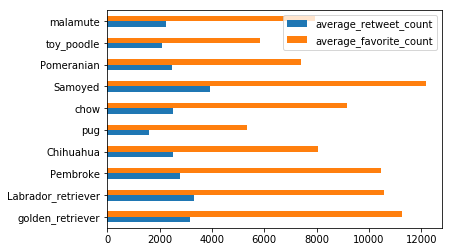

In [165]:
# Draw horizontal bar between average retweet and favorite counts for thel largerst breed values

breed_df = pd.DataFrame({"average_retweet_count":avg_retweet, 'average_favorite_count':avg_favorite}, index=freq_breed)
ax = breed_df.plot.barh()


In [170]:
df.groupby("p1").retweet_count.mean()

p1
Afghan_hound                       5151.333333
African_crocodile                   238.000000
African_grey                       1119.000000
African_hunting_dog                1032.000000
Airedale                           1208.333333
American_Staffordshire_terrier     1632.666667
American_black_bear                1133.000000
Angora                            14283.000000
Appenzeller                        1250.500000
Arabian_camel                     17701.000000
Arctic_fox                          240.250000
Australian_terrier                 2699.000000
Bedlington_terrier                 2480.800000
Bernese_mountain_dog               1387.500000
Blenheim_spaniel                   2236.300000
Border_collie                      1929.083333
Border_terrier                     2946.000000
Boston_bull                        1485.222222
Brabancon_griffon                   251.666667
Brittany_spaniel                   1302.571429
Cardigan                           3923.529412
Chesapeake

In [171]:
df.groupby("p1").retweet_count.mean().max()

17701.0

- However the golden retriever breed was the most frequent value in out data set, it is not the biggest average retweet or favourite. The biggest average retweet is 17701 for Arabian_camel breed.


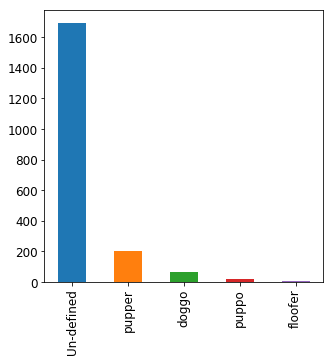

In [162]:
# value counts of the dog stages

df["dog_stage"].value_counts().plot(kind="bar", figsize=(5,5),fontsize=12)

- the un-defined dog stage is very huge so we will not consider this parameter in out analysis because it needs more investigation.

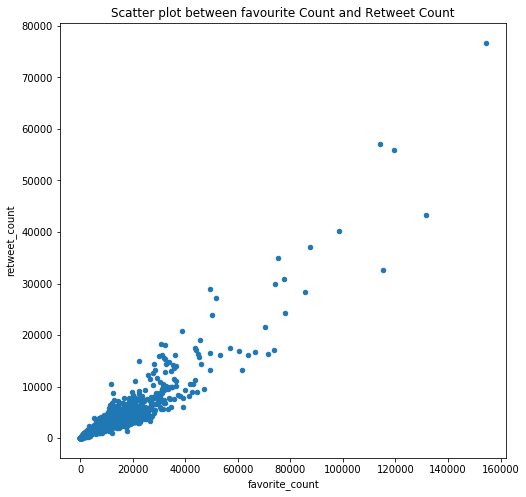

In [163]:
# Scatter plot between favourite Count and Retweet Count

df.plot.scatter(x="favorite_count", y="retweet_count" ,figsize=(8, 8),title="Scatter plot between favourite Count and Retweet Count")

- there is strong positive correlation between favourite Count and Retweet Count